In [1]:
#importing Libraries
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data.csv'
data = pd.read_csv(file_to_load)

In [3]:
#Getting the columns needed for the analysis
cleanedData = data.loc[:, ['Reported_Date', 'Description']]

In [4]:
#Converting reported date field to type datetime
cleanedData['Reported_Date'] = pd.to_datetime(cleanedData['Reported_Date'], errors='coerce')

# Total Number of Crimes by Month

In [5]:
#Getting the total number of crimes that took place in each month,
#got the code from https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
totalByMonth = cleanedData.groupby(cleanedData['Reported_Date'].dt.strftime('%B'))['Reported_Date'].count()
totalByMonth

Reported_Date
April        10418
August       11746
December      9417
February      8877
January      10191
July         11489
June         11487
March        10796
May          11693
November      9955
October      11990
September    10879
Name: Reported_Date, dtype: int64

In [6]:
#Converting the series to a dataframe to make user friendly to work with
totalByMonth_df = pd.DataFrame(totalByMonth)

In [7]:
#sorting the dataframe to list the results in sorted manner,
#got the code from https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
         'November', 'December']
totalByMonth_df.index = pd.CategoricalIndex(totalByMonth_df.index, categories=months, ordered=True)
totalByMonth_df = totalByMonth_df.sort_index()
totalByMonth_df

,Reported_Date
Reported_Date,
January,10191
February,8877
March,10796
April,10418
May,11693
June,11487
July,11489
August,11746
September,10879


In [8]:
summ = ['April', 'May','June','July','August', 'September']
wint = ['October', 'November', 'December', 'January', 'February', 'March']
summer = totalByMonth_df.loc[summ, :].sum()
winter = totalByMonth_df.loc[wint, :].sum()
winter

Reported_Date    61226
dtype: int64

In [9]:
season = pd.DataFrame({'Season': ['Summer', 'Winter'],
                      'Total' : [summer.get(key='Reported_Date'), winter.get(key='Reported_Date')]})
season

,Season,Total
0,Summer,67712
1,Winter,61226


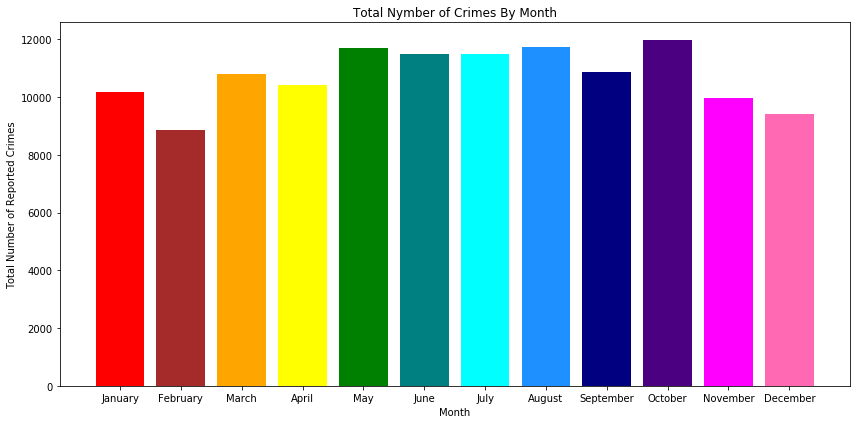

In [10]:
#Creating the plot to represent the data
colors =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'navy', 'indigo', 'magenta','hotpink']
fig, ax = plt.subplots(figsize=(12,6))
totalCrimes = plt.bar(x = totalByMonth_df.index, height= totalByMonth_df['Reported_Date'], color=colors)
plt.title("Total Nymber of Crimes By Month")
plt.xlabel('Month')
plt.ylabel('Total Number of Reported Crimes')
plt.tight_layout()
plt.show()

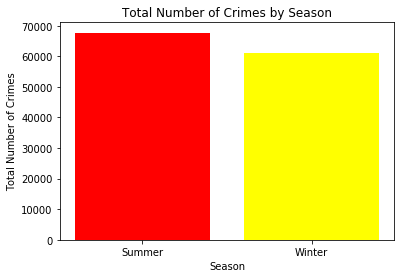

In [32]:
fig, ax1 = plt.subplots()
seasonalgraph =ax1.bar(x=season['Season'], height=season['Total'], color=['red', 'yellow'])
plt.xlabel('Season')
plt.ylabel('Total Number of Crimes')
plt.title('Total Number of Crimes by Season')
plt.show()

# Types of Crimes by Month

In [12]:
copy = cleanedData
copy['Reported_Date'] = pd.to_datetime(copy['Reported_Date'], errors='coerce')
copy['Month'] =  copy['Reported_Date'].dt.strftime('%B')
copy = copy.replace({'Agg Assault - Domest': 'Aggravated Assault', 'Aggravated Assault (': 'Aggravated Assault', 'Agg Assault': 'Aggravated Assault', 'agg assault': 'Aggravated Assault',
                     'AGG ASSAULT': 'Aggravated Assault', 'Agg Assault - Drive-': 'Aggravated Assault', 'agg assault': 'Aggravated Assault', 'Arson with Fire Bomb': 'Arson', 'HOMICIDE/Non Neglige': 'Homicide',
                    'Justifiable Homicide': 'Homicide', 'Non Agg Assault Dome': 'Non Aggravated Assault', 'non aggravated assau': 'Non Aggravated Assault','Non Aggravated Assau': 'Non Aggravated Assault', 
                     'Sex Off Follow/Entic': 'Sexual Assault', 'Sex Off Fondle - mol': 'Sexual Assault', 'Sex Off Incest': 'Sexual Assault', 'Sex Off Indecent Con': 'Sexual Assault', 'Sex Off Indecent Exp': 'Sexual Assault', 
                     'Sex Off Misconduct': 'Sexual Assault', 'Sex Offense -others': 'Sexual Assault', 'Sexual Assault with': 'Sexual Assault', 'Forcible Fondling': 'Sexual Assault', 'Kidnapping/Abduction': 'Kidnapping'})
copy = copy.replace({'Auto Theft Outside S': 'Auto Theft', 'Burglary - Non Resid': 'Burglary', 'Burglary - Residence': 'Burglary', 'Business Robbery': 'Robbery', 'property damage': 'Property Damage','Stealing All Other': 'Stealing',
                     'Stealing Auto Parts': 'Stealing', 'Stealing Auto Parts/': 'Stealing', 'Stealing Bicycles': 'Stealing', 'Stealing Coin Operat': 'Stealing', 'Stealing From Auto': 'Stealing', 'Stealing Pickpocket': 'Pickpocket', 
                     'Stealing Purse Snatc': 'Snatchning', 'Stealing Shoplifting': 'Shoplifting', 'Stealing from Buildi': 'Stealing', 'Stolen Property OFFE': 'Stolen Property', 'Strong Arm Robbery': 'Armed Robbery', 
                     'Withhold Property': 'Larceny', 'stealing': 'Stealing', 'stealing from buildi': 'Stealing'})
copy = copy.replace({'Accidental Drug Over': 'Drug Overdose', 'Driving Under Influe': 'DUI', 'Drunkenness': 'Misdemeanor', 'Hit and Run of a Per': 'Hit and Run', 'Human Trafficking/Co': 'Human Trafficking','Liquor Law Violaton': 'Violation',
                    'Disorderly Conduct': 'Misdemeanor', 'Bomb Threat/Intimida': 'Felony', 'Bombing (other than': 'Felony','False ID': 'Impersonation', 'False Information to': 'Impersonation','Impersonation - NOT': 'Impersonation', 'Gambling - Possessio': 'Gambling',
                    'Possession of Drug E': 'Possession of Drug', 'Possession/Sale/Dist': 'Possession of Drug', 'Resisting an Officer' : 'Misdemeanor', 'TRESPASS': 'Trespassing', 'Violation Ex Parte O': 'Violation', 'Violation Full Order': 'Violation', 'Possesion': 'Possession of Drug', 
                     'Weapons Law Violatio': 'Violation'})
copy = copy.replace({'Animal Bite - Dog': 'Animal Bite','Interference with Cu': 'Interference', 'Misc Offense': 'Misc', 'Misc Violation': 'Misc', 'misc violation': 'Misc', 'Promoting Prostituti': 'Prostitution', 'Prostitution/Patroni': 'Prostitution', 'Prostitution/Solicit': 'Prostitution',
                     'Suicide By Jumping': 'Suicide', 'Suicide By Shooting': 'Suicide', 'Suicide By Sleeping': 'Suicide', 'Suicide by Other Mea': 'Suicide', 'URINATE IN PUBLIC': 'Misdemeanor/Other','TRASH DUMPING': 'Misdemeanor/Other','`': 'Misc','misc': 'Misc', 'Attempt Suicide by D': 'Attempt Suicide',
                     'Attempt Suicide by G': 'Attempt Suicide', 'Attempt Suicide by H': 'Attempt Suicide', 'Attempt Suicide by J': 'Attempt Suicide', 'Attempt Suicide by O': 'Attempt Suicide', 'Attempt Suicide by P': 'Attempt Suicide', 'Attempt Suicide by S': 'Attempt Suicide', 'Attempt Suicide by C': 'Attempt Suicide'})
copy = copy.replace({ 'Passing Bad Checks' : 'Counterfeiting','Extortion/Blackmail': 'Blackmail','black mail': 'Blackmail', 'Fraud/Confidence Gam': 'Fraud', 'forgery': 'Forgery', 'Casualty (includes a': 'Casualty', 'Hacking/Computer Inv': 'Cybercrime', 'Dumping (littering)': 'Misdemeanor/Other', 'Missing/Runaway Juve': 'Missing'})

In [13]:
typesofCrime = copy.groupby(['Month','Description'])['Reported_Date'].count()

In [14]:
crime = pd.DataFrame(typesofCrime).reset_index()

In [15]:
crime = crime.pivot(index='Month', columns='Description', values='Reported_Date')
crime

Description,Aggravated Assault,Animal Bite,Animal Cruelty,Armed Robbery,Arson,Attempt Suicide,Auto Theft,Blackmail,Bribery,Burglary,...,Stalking,Statutory Rape,Stealing,Stolen Property,Suicide,Suicide By Hanging,Trespassing,Violation,Welfare Fraud,Wire Fraud
Month,,,,,,,,,,,,,,,,,,,,,
April,891.0,NaN,NaN,316.0,48.0,7.0,719.0,NaN,2.0,714.0,...,NaN,NaN,1796.0,54.0,2.0,NaN,287.0,222.0,NaN,13.0
August,916.0,NaN,NaN,582.0,49.0,7.0,913.0,NaN,NaN,813.0,...,NaN,8.0,2320.0,66.0,NaN,1.0,335.0,222.0,NaN,16.0
December,741.0,NaN,NaN,358.0,25.0,4.0,674.0,6.0,NaN,636.0,...,6.0,9.0,1781.0,66.0,1.0,NaN,295.0,139.0,NaN,11.0
February,617.0,NaN,NaN,275.0,35.0,6.0,834.0,NaN,NaN,597.0,...,8.0,14.0,1625.0,90.0,NaN,NaN,271.0,135.0,NaN,36.0
January,839.0,NaN,2.0,513.0,70.0,18.0,998.0,4.0,NaN,657.0,...,NaN,6.0,1915.0,99.0,1.0,1.0,226.0,185.0,NaN,35.0
July,951.0,NaN,NaN,493.0,45.0,10.0,848.0,10.0,NaN,821.0,...,6.0,8.0,2123.0,46.0,1.0,NaN,372.0,192.0,NaN,19.0
June,1072.0,1.0,5.0,429.0,36.0,10.0,848.0,2.0,NaN,692.0,...,8.0,4.0,2215.0,96.0,1.0,NaN,316.0,170.0,NaN,21.0
March,851.0,NaN,1.0,430.0,36.0,15.0,869.0,4.0,NaN,802.0,...,8.0,8.0,2045.0,83.0,2.0,NaN,355.0,160.0,NaN,10.0
May,947.0,NaN,NaN,426.0,33.0,7.0,919.0,6.0,NaN,800.0,...,8.0,5.0,2127.0,117.0,NaN,NaN,289.0,197.0,NaN,19.0


In [16]:
# crime.columns.values

# Personal Crime

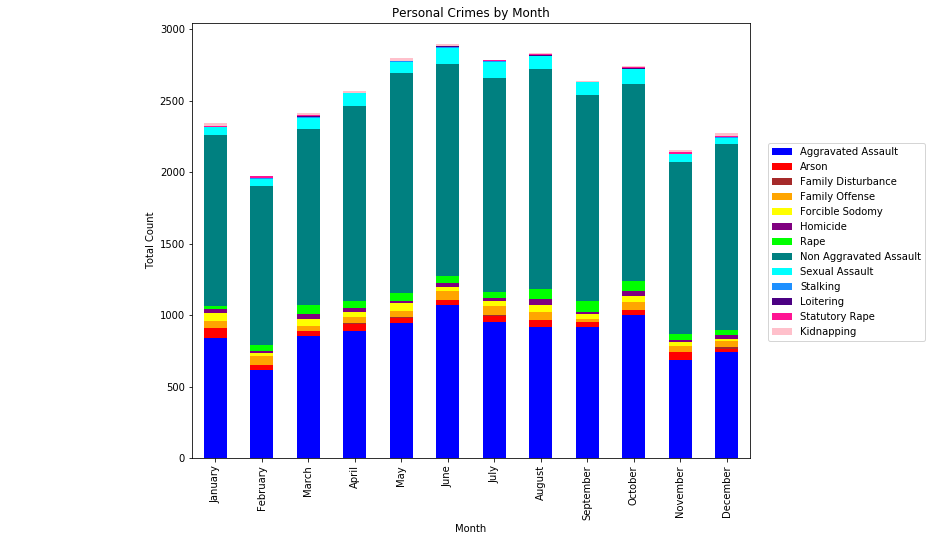

In [25]:
#Defining a list that contains the types of Personal Crimes
personalCrimes = ['Aggravated Assault', 'Arson', 'Family Disturbance', 'Family Offense', 'Forcible Sodomy', 
                  'Homicide', 'Rape','Non Aggravated Assault', 'Sexual Assault', 'Stalking', 'Loitering', 
                  'Statutory Rape', 'Kidnapping']
Col =['blue', 'red', 'brown', 'orange', 'yellow','purple', 'lime', 'teal', 'cyan', 'dodgerblue', 'indigo','deeppink', 'pink']

pCrimes = crime.loc[months, personalCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
lgd = pCrimes.legend(bbox_to_anchor=(1.15,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
text = pCrimes.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)

#Setting title, x-label and y-label
pCrimes.set_title('Personal Crimes by Month')
pCrimes.set_xlabel('Month')
pCrimes.set_ylabel('Total Count')
plt.show()

In [18]:
fig = pCrimes.get_figure()
fig.savefig('Personal Crimes by Month',bbox_extra_artists=(lgd, text), bbox_inches='tight')

# Property Crime 

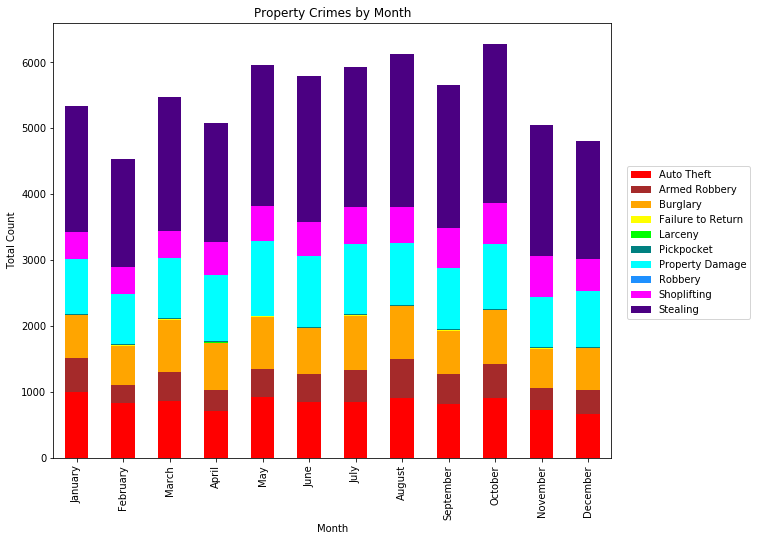

In [19]:
propertyCrimes = ['Auto Theft', 'Armed Robbery', 'Burglary', 'Failure to Return', 'Larceny', 'Pickpocket', 'Property Damage',
                 'Robbery', 'Shoplifting', 'Stealing']
Col =['red', 'brown', 'orange', 'yellow', 'lime', 'teal', 'cyan', 'dodgerblue', 'magenta','indigo']
propCrimes = crime.loc[months, propertyCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
propCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

#Setting title, x-label and y-label
propCrimes.set_title('Property Crimes by Month')
propCrimes.set_xlabel('Month')
propCrimes.set_ylabel('Total Count')
plt.show()

# Statutory Crime

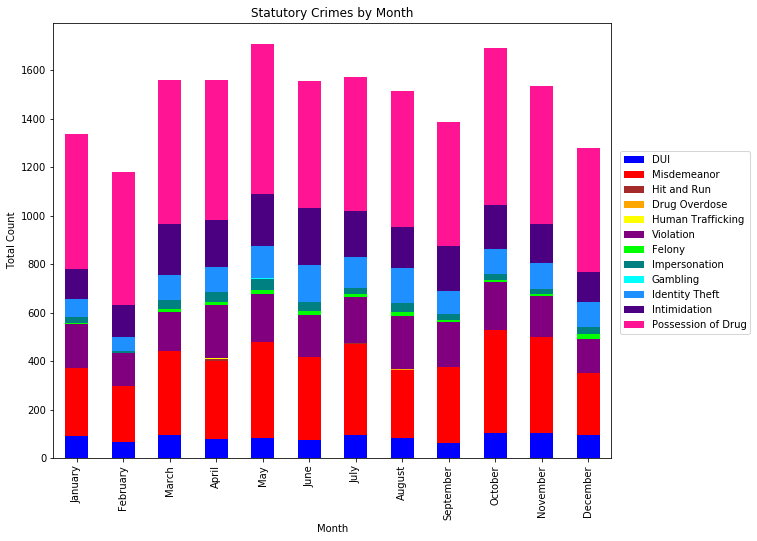

In [20]:
statutoryCrimes = ['DUI', 'Misdemeanor', 'Hit and Run','Drug Overdose', 'Human Trafficking', 'Violation', 'Felony', 'Impersonation',
                  'Gambling', 'Identity Theft', 'Intimidation', 'Possession of Drug']
Col =['blue', 'red', 'brown', 'orange', 'yellow','purple', 'lime', 'teal', 'cyan', 'dodgerblue', 'indigo','deeppink', 'pink']
statCrimes = crime.loc[months, statutoryCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
statCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

#Setting title, x-label and y-label
statCrimes.set_title('Statutory Crimes by Month')
statCrimes.set_xlabel('Month')
statCrimes.set_ylabel('Total Count')
plt.show()

# Financial Crime

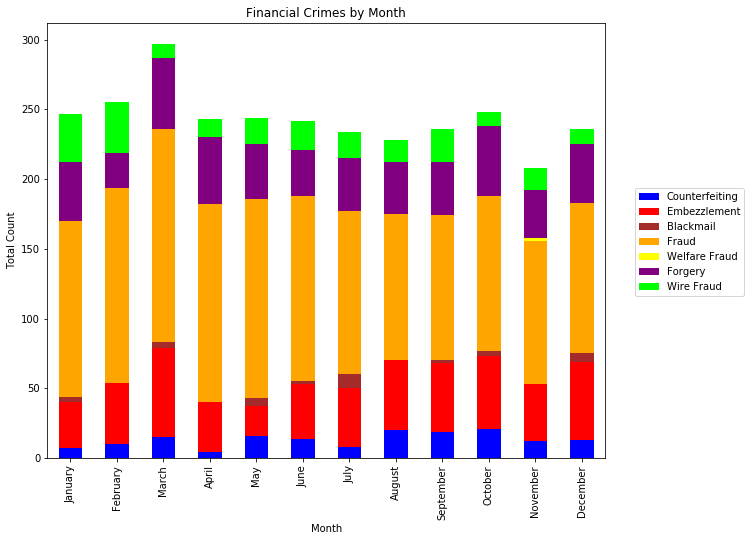

In [21]:
financialCrimes = ['Counterfeiting', 'Embezzlement', 'Blackmail', 'Fraud', 'Welfare Fraud', 'Forgery', 'Wire Fraud']
Col =['blue', 'red', 'brown', 'orange', 'yellow','purple', 'lime', 'teal', 'cyan', 'dodgerblue', 'indigo','deeppink', 'pink']
finanCrimes = crime.loc[months, financialCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
finanCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

#Setting title, x-label and y-label
finanCrimes.set_title('Financial Crimes by Month')
finanCrimes.set_xlabel('Month')
finanCrimes.set_ylabel('Total Count')
plt.show()

# Other Crimes

C:\Users\layla\anaconda\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


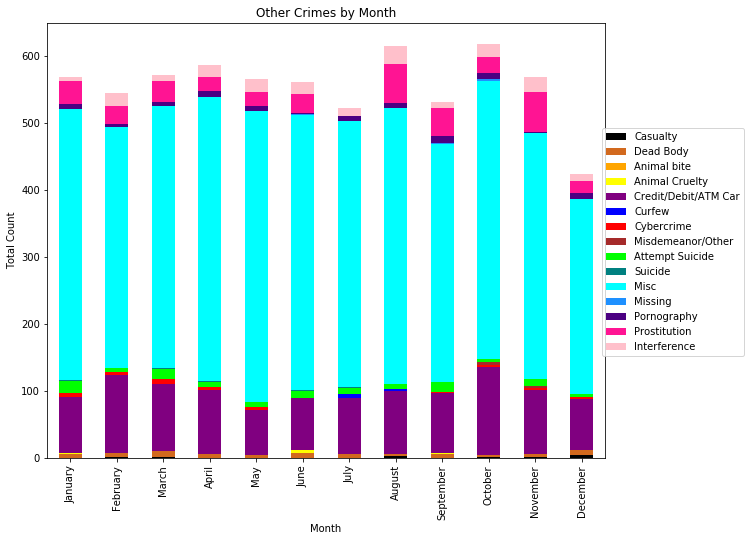

In [22]:
otherCrimes = ['Casualty', 'Dead Body', 'Animal bite', 'Animal Cruelty', 'Credit/Debit/ATM Car', 'Curfew', 'Cybercrime', 'Misdemeanor/Other',
              'Attempt Suicide', 'Suicide', 'Misc', 'Missing', 'Pornography', 'Prostitution', 'Interference']
Col =['black', 'chocolate', 'orange', 'yellow','purple', 'blue', 'red', 'brown', 'lime', 'teal', 'cyan', 'dodgerblue', 'indigo','deeppink', 'pink']
othCrimes = crime.loc[months, otherCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
othCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

#Setting title, x-label and y-label
othCrimes.set_title('Other Crimes by Month')
othCrimes.set_xlabel('Month')
othCrimes.set_ylabel('Total Count')
plt.show()